In [56]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading all traffic data

In [57]:
# load dataset
input_file = 'C:/Users/AbdouAA/Work Folders/Documents/GitHub/k2-respunkt/data/RST_2015_v38_42.csv'
traffic_data = pd.read_csv(input_file, delimiter=';')
traffic_data.sample(7)

,Tåguppdrag,Tågnr,Tågordning uppdrag,Datum (PAU),Tågslag,UppehållstypAvgång,UppehållstypAnkomst,Delsträckanummer,Första platssignatur,Första platssignatur för uppdrag,...,Planerad ankomsttid,Planerad avgångstid,Dragfordonsid,Framförda tågkm,Rapporterad tågvikt,Rapporterad tåglängd,Antal rapporterade vagnar,Antal rapporterade hjulaxlar,Inställtflagga,Planeringsstatus
15792,2305,2305,1,2015-09-18,RST,Uppehåll,Passage,9,BÅL,BÅL,...,2015-09-18 05:51,2015-09-18 05:49,X606039,2.50390,412.0,214.2,0,28,N,P
76471,2833,2833,1,2015-10-04,RST,Passage,Uppehåll,12,BÅL,BÅL,...,2015-10-04 12:58,2015-10-04 12:56,X606020,2.45735,206.0,107.1,0,14,N,P
64576,2527,2527,1,2015-10-01,RST,Uppehåll,Uppehåll,2,KÄN,KÄN,...,2015-10-01 10:57,2015-10-01 10:53,X606047,3.58323,412.0,214.2,0,28,N,P
104347,2510,2510,1,2015-10-12,RST,Uppehåll,Uppehåll,17,VHE,VHE,...,2015-10-12 07:33,2015-10-12 07:28,X606017,2.90488,412.0,214.2,0,28,N,P
129273,2857,2857,1,2015-10-18,RST,Första,Passage,1,BÅL,BÅL,...,2015-10-18 18:25,2015-10-18 18:23,X606074,4.53200,206.0,107.1,0,14,N,P
5416,2563,2563,1,2015-09-15,RST,Passage,Uppehåll,6,KÄN,KÄN,...,2015-09-15 20:09,2015-09-15 20:06,X606032,2.52229,206.0,107.1,0,14,N,P
57089,2554,2554,1,2015-09-29,RST,Uppehåll,Uppehåll,2,VHE,VHE,...,2015-09-29 17:44,2015-09-29 17:41,X606039,2.70859,412.0,214.2,0,28,N,P


### > Describe loaded data

In [58]:
traffic_data.info()
len(traffic_data.index)
# keep some the most relevant columns

#  0   Tåguppdrag
#  1   Tågnr
#  2   Tågordning uppdrag
#  3   Datum (PAU)
#  5   UppehållstypAvgång
#  6   UppehållstypAnkomst
#  7   Delsträckanummer
#  8   Första platssignatur
#  9   Första platssignatur för uppdrag
#  10  Sista platssignatur 
#  11  Sista platssignatur för uppdrag
#  12  Avgångsplats
#  13  Från platssignatur
#  14  Ankomstplats
#  15  Till platssignatur
#  16  Sträcka med riktning
#  17  Inställelseorsakskod
#  18  Inställelseorsak
#  19  Ankomsttid
#  20  Avgångstid 
#  21  Planerad ankomsttid 
#  22  Planerad avgångstid
#  24  Framförda tågkm 
#  29  Inställtflagga 
#  30  Planeringsstatust 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130032 entries, 0 to 130031
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Tåguppdrag                        130032 non-null  int64  
 1   Tågnr                             130032 non-null  int64  
 2   Tågordning uppdrag                130032 non-null  int64  
 3   Datum (PAU)                       130032 non-null  object 
 4   Tågslag                           130032 non-null  object 
 5   UppehållstypAvgång                130032 non-null  object 
 6   UppehållstypAnkomst               130032 non-null  object 
 7   Delsträckanummer                  130032 non-null  int64  
 8   Första platssignatur              130032 non-null  object 
 9   Första platssignatur för uppdrag  130032 non-null  object 
 10  Sista platssignatur               130032 non-null  object 
 11  Sista platssignatur för uppdrag   130032 non-null  o

130032

### > Remove useless columns

In [60]:
columns_to_drop = [4, 23, 25, 26, 27, 28]
traffic_data_filtered = traffic_data.drop(columns=traffic_data.columns[columns_to_drop])
# Convert relevant date and time columns to datetime format
traffic_data_filtered['Datum (PAU)'] = pd.to_datetime(traffic_data_filtered['Datum (PAU)'],errors='coerce')
traffic_data_filtered['Ankomsttid'] = pd.to_datetime(traffic_data_filtered['Ankomsttid'],errors='coerce')
traffic_data_filtered['Avgångstid'] = pd.to_datetime(traffic_data_filtered['Avgångstid'], errors='coerce')
traffic_data_filtered['Planerad ankomsttid'] = pd.to_datetime(traffic_data_filtered['Planerad ankomsttid'],errors='coerce')
len(traffic_data_filtered)

130032

## Data preprocessings

### > Cleaning data - keep only working weekdays

In [61]:
# keep only weekdays
traffic_data_filtered = traffic_data_filtered[traffic_data_filtered['Datum (PAU)'].dt.weekday < 5]

# list of non-working days in Stockholm in 2015
holiday_dates = [
    '2015-01-01', '2015-01-06', '2015-02-14', '2015-03-29', '2015-04-02', '2015-04-03', 
    '2015-04-05', '2015-04-06', '2015-04-30', '2015-05-01', '2015-05-09', '2015-05-14', 
    '2015-05-24', '2015-05-31', '2015-06-06', '2015-06-19', '2015-06-20', '2015-10-25', 
    '2015-10-31', '2015-11-08', '2015-11-11', '2015-11-29', '2015-12-06', '2015-12-13', 
    '2015-12-13', '2015-12-20', '2015-12-24', '2015-12-25', '2015-12-26', '2015-12-31'
]

# Filter out holiday dates from valid_arrivals DataFrame
traffic_data_filtered = traffic_data_filtered[~traffic_data_filtered['Datum (PAU)'].dt.date.astype(str).isin(holiday_dates)]
len(traffic_data_filtered)

99204

### DEBUGGG!!! Cleaning data - remove all cancelled trains

In [46]:
# save/back-up the set (incl. cancelled trains) to test in OTP/STM
traffic_data_filtered_saved = traffic_data_filtered

# # Identify Tåguppdrag and Datum (PAU) pairs where any row has no arrival time
# cancelled_trains = traffic_data_filtered[traffic_data_filtered['Ankomsttid'].isna()][['Tåguppdrag', 'Datum (PAU)']].drop_duplicates()

# # Merge the original DataFrame with the cancelled trains to identify and filter out rows
# traffic_data_filtered = traffic_data_filtered.merge(
#     cancelled_trains.assign(cancelled=True),
#     on=['Tåguppdrag', 'Datum (PAU)'],
#     how='left'
# )

# # Filter out the rows where the cancelled flag is True
# traffic_data_filtered = traffic_data_filtered[traffic_data_filtered['cancelled'].isna()]

# # Drop the cancelled flag column
# traffic_data_filtered = traffic_data_filtered.drop(columns=['cancelled'])
# len(traffic_data_filtered)

### CHECK!!! Cleaning data - passages with no arrival/departure times

In [47]:
# Drop rows without valid arrival and departure times at all stop stations (uppehåll)
traffic_data_filtered = traffic_data_filtered[~((traffic_data_filtered['UppehållstypAvgång'] == 'Uppehåll') & (traffic_data_filtered['Avgångstid'].isna()))]
traffic_data_filtered = traffic_data_filtered[~((traffic_data_filtered['UppehållstypAnkomst'] == 'Uppehåll') & (traffic_data_filtered['Ankomsttid'].isna()))]
print(len(traffic_data_filtered))

90489


### > Cleaning data - remove only passing train observations

In [52]:
# Drop all passage stations (if any)
traffic_data_filtered = traffic_data_filtered[~((traffic_data_filtered['UppehållstypAvgång'] == 'Passage') & (traffic_data_filtered['UppehållstypAnkomst'] == 'Passage'))]
len(traffic_data_filtered.index)

98854

### DEBUGG > Cleaning data - merge observations at passing stations

In [38]:
# Identify rows where UppehållstypAvgång or UppehållstypAnkomst is 'Passage'
passage_rows_avg = traffic_data_filtered[traffic_data_filtered['UppehållstypAvgång'] == 'Passage']
passage_rows_ank = traffic_data_filtered[traffic_data_filtered['UppehållstypAnkomst'] == 'Passage']

# Merge the rows within each Tåguppdrag and Datum (PAU)
merged_rows = []

# Loop through each unique Tåguppdrag and Datum (PAU) with passage movements
unique_ids = set(zip(passage_rows_avg['Tåguppdrag'], passage_rows_avg['Datum (PAU)'])) & set(zip(passage_rows_ank['Tåguppdrag'], passage_rows_ank['Datum (PAU)']))

for tåg_id, datum in unique_ids:
    # Get the rows for the current Tåguppdrag and Datum (PAU)
    row_avg = passage_rows_avg[(passage_rows_avg['Tåguppdrag'] == tåg_id) & (passage_rows_avg['Datum (PAU)'] == datum)].iloc[0]
    row_ank = passage_rows_ank[(passage_rows_ank['Tåguppdrag'] == tåg_id) & (passage_rows_ank['Datum (PAU)'] == datum)].iloc[0]

    # Merge the rows according to the specified rules
    merged_row = row_avg.copy()
    merged_row['UppehållstypAvgång'] = row_ank['UppehållstypAvgång']
    merged_row['UppehållstypAnkomst'] = row_avg['UppehållstypAnkomst']
    merged_row['Delsträckanummer'] = row_ank['Delsträckanummer']
    merged_row['Avgångsplats'] = row_ank['Avgångsplats']
    merged_row['Från platssignatur'] = row_ank['Från platssignatur']
    merged_row['Ankomstplats'] = row_avg['Ankomstplats']
    merged_row['Till platssignatur'] = row_avg['Till platssignatur']
    merged_row['Ankomsttid'] = row_avg['Ankomsttid']
    merged_row['Avgångstid'] = row_ank['Avgångstid']
    merged_row['Planerad ankomsttid'] = row_avg['Planerad ankomsttid']
    merged_row['Planerad avgångstid'] = row_ank['Planerad avgångstid']
    merged_row['Framförda tågkm'] = row_avg['Framförda tågkm'] + row_ank['Framförda tågkm']

    # # special cases of Huv (Huvudsta) från
    # if(merged_row['Från platssignatur']=='Huv'):
    #     print(merged_row)

    # # special cases of Äsg (Älvsjö godsbangård) Till
    # if(merged_row['Till platssignatur']=='Äsg'):
    #     print(merged_row)

    merged_rows.append(merged_row)

# Create a DataFrame from the merged rows
merged_rows_df = pd.DataFrame(merged_rows)

# Remove the original passage rows
traffic_data_filtered = traffic_data_filtered[~((traffic_data_filtered['UppehållstypAvgång'] == 'Passage') | (traffic_data_filtered['UppehållstypAnkomst'] == 'Passage'))]

# Add the merged rows
traffic_data_filtered = pd.concat([traffic_data_filtered, merged_rows_df], ignore_index=True)
print(len(traffic_data_filtered))

69274


# OTP and STM

### > OTP calulation

In [39]:
# Filter rows where UppehållstypAnkomst is "Sista"
destination_arrivals = traffic_data_filtered_saved[traffic_data_filtered_saved['UppehållstypAnkomst'] == 'Sista']

# drop cancelled trains 
valid_arrivals = destination_arrivals.dropna(subset=['Ankomsttid'])

# Calculate punctuality delay at destination station (in minutes)
OTP_destination = (valid_arrivals['Ankomsttid'] - valid_arrivals['Planerad ankomsttid']).dt.total_seconds() / 60.0

print(OTP_destination.min())
print(OTP_destination.max())
OTP_destination.sample(7)

-5.0
141.0


406509   -1.0
692216   -2.0
174293    0.0
291920    0.0
653033    1.0
203882   -1.0
876326    1.0
dtype: float64

### > Plotting - OTP distribution 

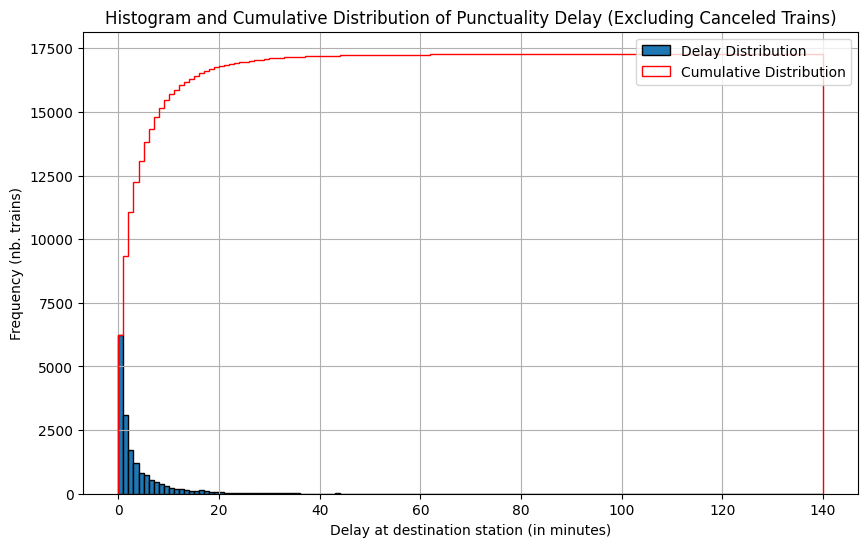

In [40]:
# Plot histogram of Punctuality Delay (excluding canceled trains)
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Specify bins for the histogram
max_delay = OTP_destination.max()
bins = range(0, int(max_delay), 1)  # Range of bins from -60 to 120 minutes with a bin width of 5 minutes

# Plot the histogram of Punctuality Delay (excluding canceled trains)
plt.hist(OTP_destination, bins=bins, edgecolor='black', label='Delay Distribution')
# Plot the cumulative distribution (cumulative histogram)
plt.hist(OTP_destination, bins=bins, cumulative=True, histtype='step', color='r', label='Cumulative Distribution')

# Add labels and title
plt.title('Histogram and Cumulative Distribution of Punctuality Delay (Excluding Canceled Trains)')
plt.xlabel('Delay at destination station (in minutes)')
plt.ylabel('Frequency (nb. trains)')
# Show grid
plt.grid(True)
# Show legend
plt.legend()
# Show the plot
plt.show()

### > Calculating OTP and STM for different thresholds (1, 3 and 5 minutes)

In [41]:
# import numpy as np

# Define delay thresholds in minutes
delay_thresholds = [1, 3, 5]

# Calculate the total number of valid arrivals (excluding canceled trains)
total_valid_arrivals = len(valid_arrivals)
total_planned_Arrivals  = len(destination_arrivals)

# Initialize dictionaries to store percentage of trains within each delay threshold
OTP_within_threshold = {}
STM_within_threshold = {}

# Loop through each delay threshold
for threshold in delay_thresholds:
    # Count number of valid arrivals within the current threshold
    num_within_threshold = np.sum(OTP_destination <= threshold)
    
    # Calculate percentage of valid arrivals within the threshold
    OTP_within_threshold[f'Within {threshold} Minutes'] = (num_within_threshold / total_valid_arrivals) * 100
    STM_within_threshold[f'Within {threshold} Minutes'] = (num_within_threshold / total_planned_Arrivals) * 100
    

# Display the percentage of trains within each delay threshold
for threshold, percentage in OTP_within_threshold.items():
    print(f"OTP (excl. cancellations) within {threshold}: {percentage:.2f}%")
for threshold, percentage in STM_within_threshold.items():
    print(f"STM (incl. cancellations) within {threshold}: {percentage:.2f}%")    


OTP (excl. cancellations) within Within 1 Minutes: 70.16%
OTP (excl. cancellations) within Within 3 Minutes: 86.41%
OTP (excl. cancellations) within Within 5 Minutes: 90.61%
STM (incl. cancellations) within Within 1 Minutes: 69.34%
STM (incl. cancellations) within Within 3 Minutes: 85.41%
STM (incl. cancellations) within Within 5 Minutes: 89.55%


### > Plotting OTP and STM for different delay thresholds X

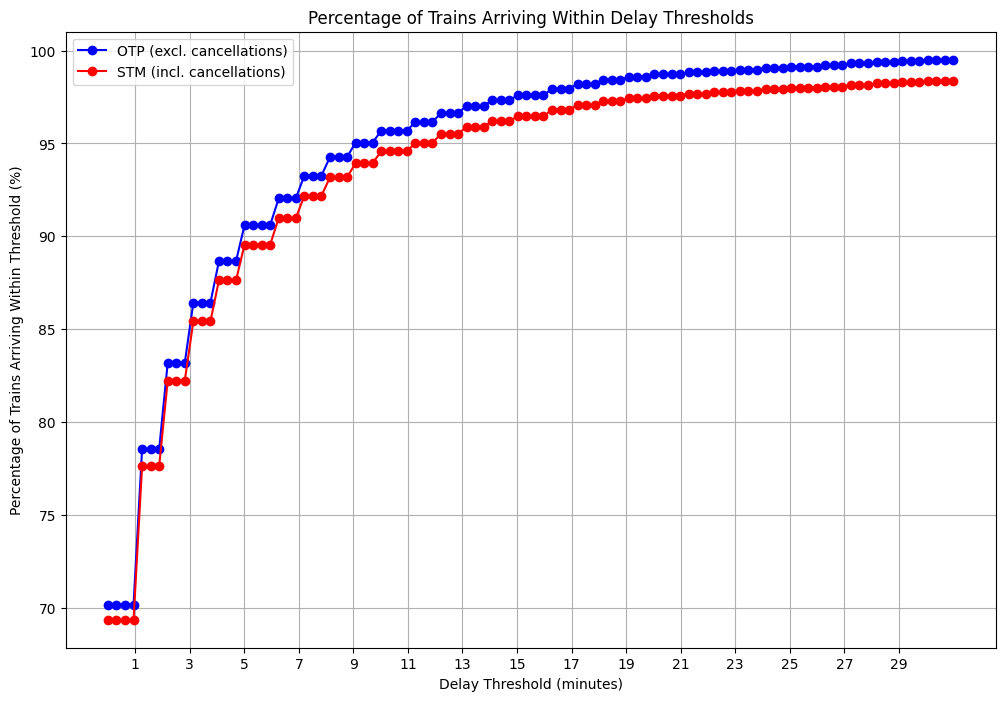

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of delay thresholds from 1 to 30 minutes
list_thresholds = np.linspace(0,31,100)
delay_thresholds = list(list_thresholds)
OTP_within_threshold = []
STM_within_threshold = []

# Calculate the percentage of trains within each delay threshold
total_valid_arrivals = len(valid_arrivals)
total_planned_Arrivals  = len(destination_arrivals)

for threshold in delay_thresholds:
    num_within_threshold = np.sum(OTP_destination <= threshold)
    OTP_within_threshold.append((num_within_threshold / total_valid_arrivals) * 100)
    STM_within_threshold.append((num_within_threshold / total_planned_Arrivals) * 100)

# Plotting the results
plt.figure(figsize=(12, 8))  # Set the figure size
plt.plot(delay_thresholds, OTP_within_threshold, marker='o', linestyle='-', color='blue', label='OTP (excl. cancellations)')
plt.plot(delay_thresholds, STM_within_threshold, marker='o', linestyle='-', color='red', label='STM (incl. cancellations)')
plt.legend()

# Add labels and title
plt.xlabel('Delay Threshold (minutes)')
plt.ylabel('Percentage of Trains Arriving Within Threshold (%)')
plt.title('Percentage of Trains Arriving Within Delay Thresholds')

# Set x-axis ticks for better readability
plt.xticks(range(1, 31, 2))  # Show ticks every 2 minutes from 1 to 30

# Show grid
plt.grid(True)

# Show the plot
plt.show()

# Temporal distribution of traffic data

### > Average number of train departures per hour of the day

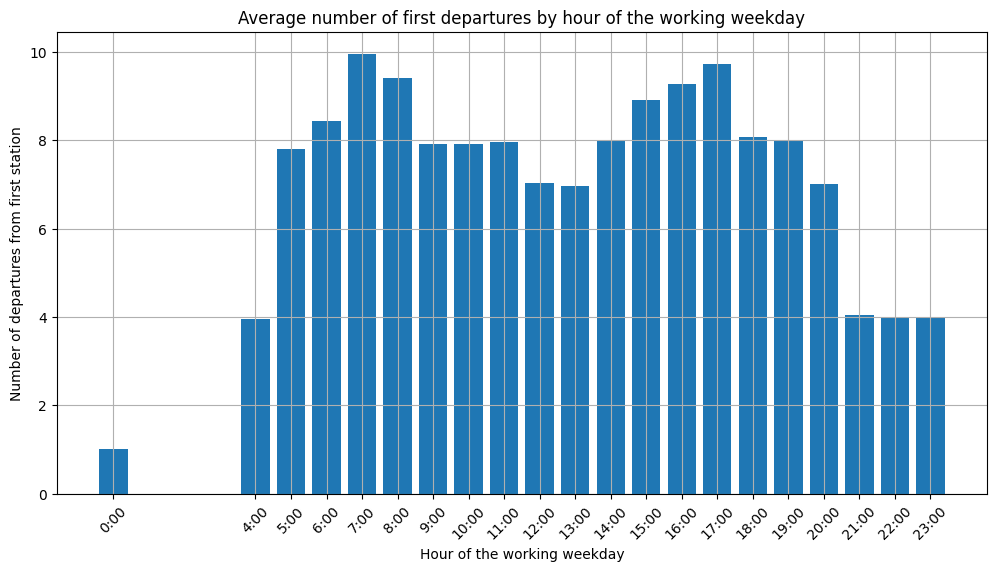

In [68]:
# Calculate hourly counts for departures based on departure time
hourly_counts = traffic_data_filtered.groupby(traffic_data_filtered[traffic_data_filtered['UppehållstypAvgång']=='Första']['Avgångstid'].dt.hour).size()

# Calculate the average departures per hour over 5 weeks with 5 working days each
hourly_average_counts = hourly_counts / (5 * 5)

# Plotting the results for hourly averages
plt.figure(figsize=(12, 6))

# Plot bar chart for average departures per hour
plt.bar(hourly_average_counts.index, hourly_average_counts)

# Add labels and title
plt.title('Average number of first departures by hour of the working weekday')
plt.xlabel('Hour of the working weekday')
plt.ylabel('Number of departures from first station')
plt.xticks(hourly_average_counts.index, [f'{int(hour)}:00' for hour in hourly_average_counts.index], rotation=45)  # Set x-axis ticks and labels
plt.grid(True)

# Show the plot
plt.show()

### > Plotting number of train arrivals per month, week and day

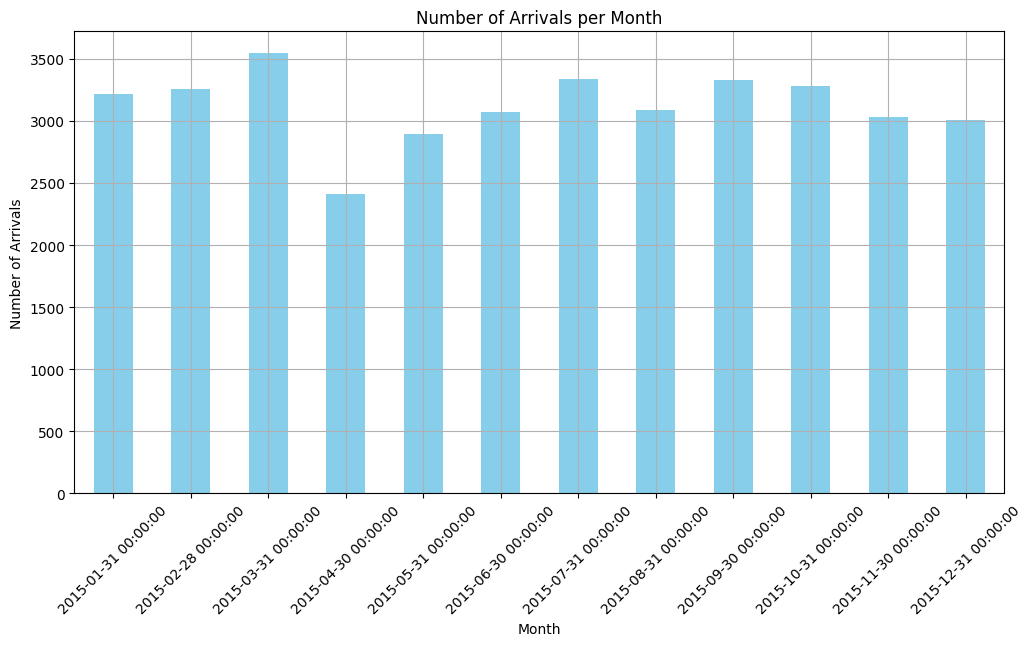

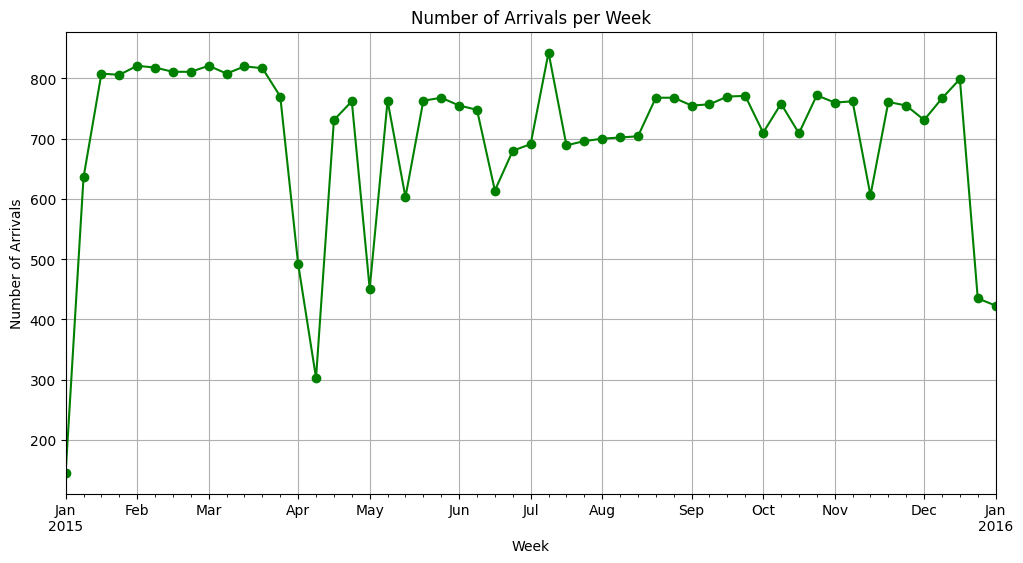

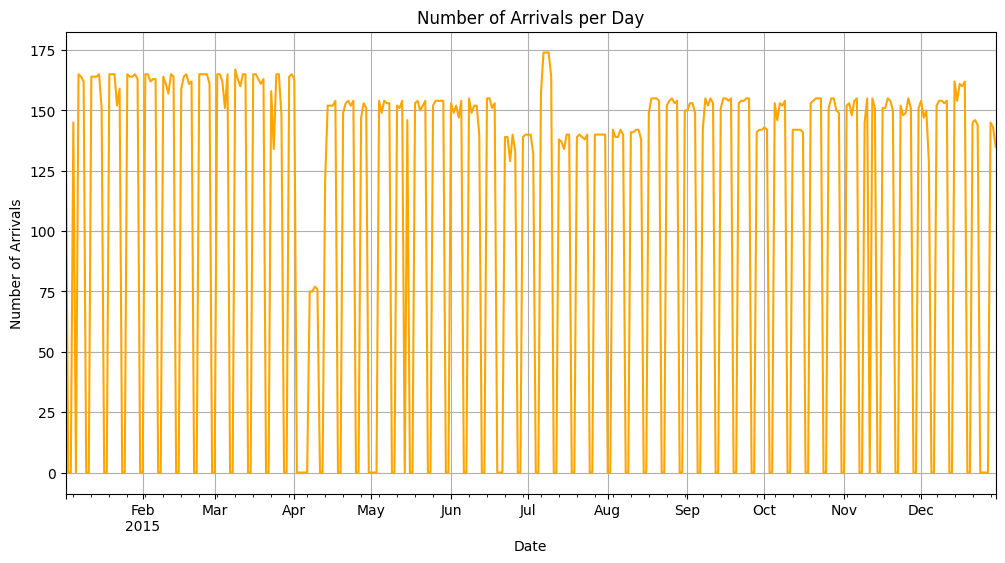

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming valid_arrivals is your DataFrame containing the traffic data

# Convert 'Datum (PAU)' column to datetime format

#destination_arrivals_weekdays = destination_arrivals[destination_arrivals['Datum (PAU)'].dt.weekday < 5]

# Plot number of arrivals per month
plt.figure(figsize=(12, 6))
destination_arrivals.resample('M', on='Datum (PAU)').size().plot(kind='bar', color='skyblue')
plt.title('Number of Arrivals per Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot number of arrivals per week
plt.figure(figsize=(12, 6))
destination_arrivals.resample('W', on='Datum (PAU)').size().plot(kind='line', marker='o', color='green')
plt.title('Number of Arrivals per Week')
plt.xlabel('Week')
plt.ylabel('Number of Arrivals')
plt.grid(True)
plt.show()

# Plot number of arrivals per day
plt.figure(figsize=(12, 6))
destination_arrivals.set_index('Datum (PAU)').resample('D').size().plot(kind='line', color='orange')
plt.title('Number of Arrivals per Day')
plt.xlabel('Date')
plt.ylabel('Number of Arrivals')
plt.grid(True)
plt.show()


### > Plotting monthly arrivals and cancellations

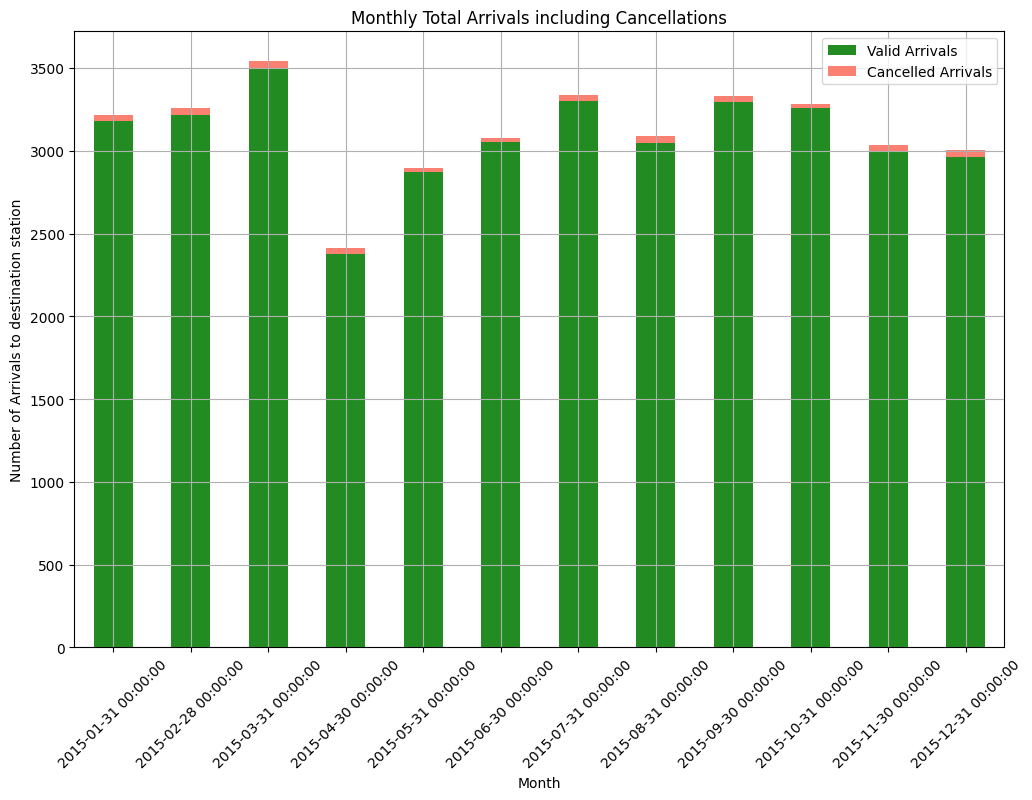

In [44]:
# Calculate total arrivals (including cancelled)
monthly_total_arrivals = destination_arrivals.resample('M', on='Datum (PAU)').size()

# Calculate valid arrivals (excluding cancelled)
valid_arrivals_counts = valid_arrivals.resample('M', on='Datum (PAU)').size()

# Calculate cancelled arrivals (subtract valid arrivals from total arrivals)
cancelled_arrivals_counts = monthly_total_arrivals - valid_arrivals_counts

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot valid arrivals (excluding cancelled)
valid_arrivals_counts.plot(kind='bar', color='forestgreen', label='Valid Arrivals')

# Plot cancelled arrivals (on top of valid arrivals)
cancelled_arrivals_counts.plot(kind='bar', color='salmon', label='Cancelled Arrivals', bottom=valid_arrivals_counts)

# Add labels and title
plt.title('Monthly Total Arrivals including Cancellations')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals to destination station')
plt.xticks(rotation=45)
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()


### > Plotting the average monthly arrivals

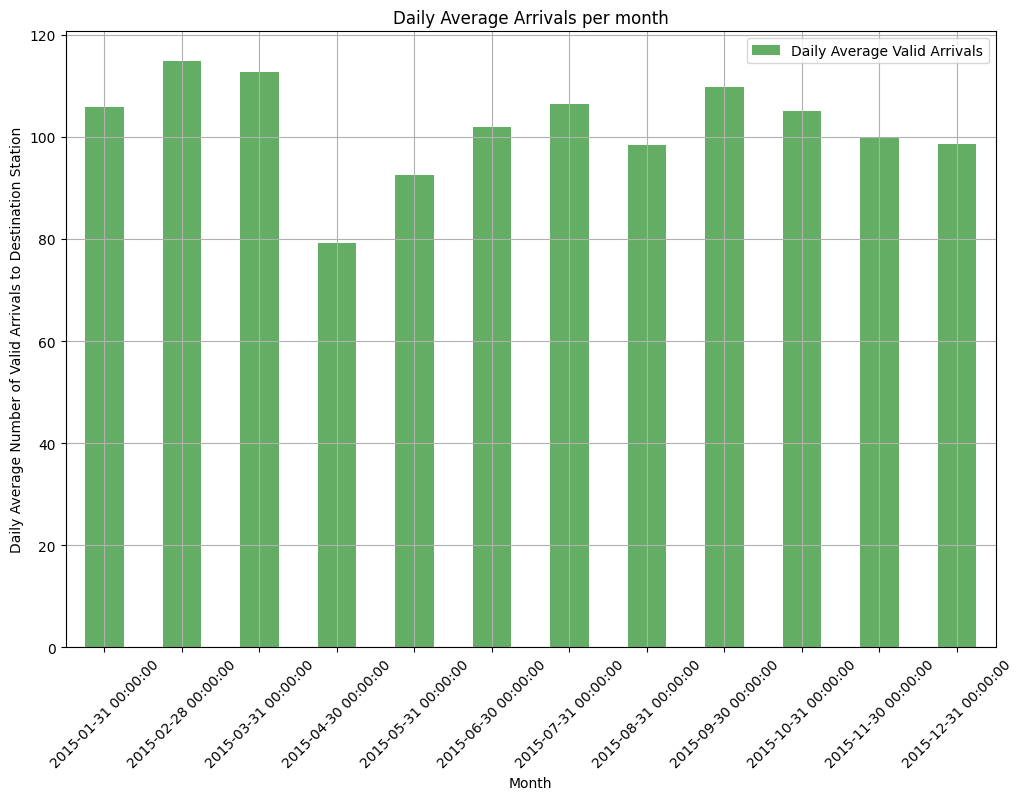

In [45]:
# Calculate daily counts for valid arrivals (excluding cancelled) excluding holiday days
daily_valid_counts = valid_arrivals.resample('D', on='Datum (PAU)').size()

# Resample by month to calculate daily averages
monthly_valid_average = daily_valid_counts.resample('M').mean()

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot daily average valid arrivals
monthly_valid_average.plot(kind='bar', color='forestgreen', alpha=0.7, label='Daily Average Valid Arrivals')

# Add labels and title
plt.title('Daily Average Arrivals per month')
plt.xlabel('Month')
plt.ylabel('Daily Average Number of Valid Arrivals to Destination Station')
plt.xticks(rotation=45)
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()

### > Plotting the average daily arrivals during a working week

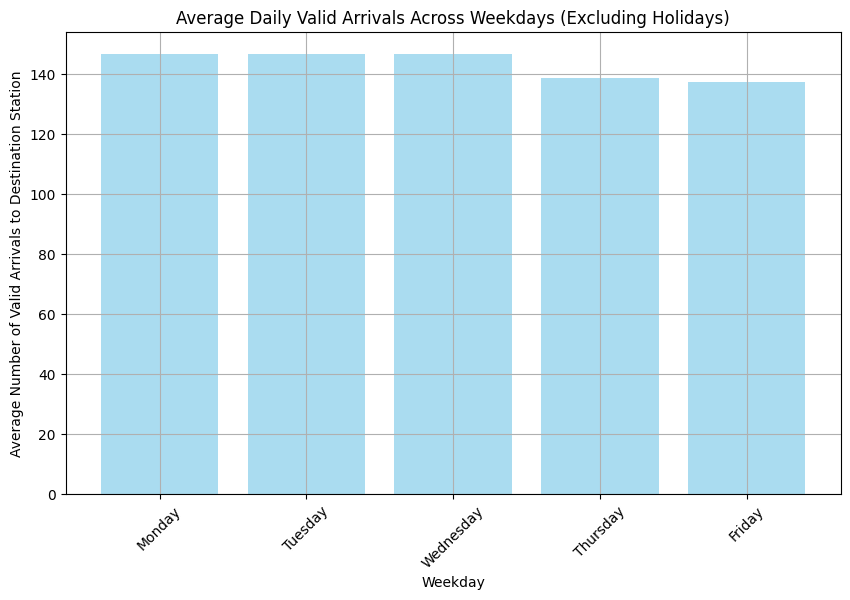

In [46]:
# Calculate daily counts for valid arrivals (excluding cancelled) excluding holiday days
daily_valid_counts = valid_arrivals.resample('D', on='Datum (PAU)').size()

# Group by weekday (dayofweek) to calculate daily averages across all weekdays
daily_weekday_averages = daily_valid_counts.groupby(daily_valid_counts.index.dayofweek).mean()

# Define weekday labels (starting from Monday)
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Plotting the results for weekdays (Monday to Friday)
plt.figure(figsize=(10, 6))

# Plot daily average valid arrivals across weekdays (Monday to Friday)
plt.bar(weekday_labels, daily_weekday_averages[:5], color='skyblue', alpha=0.7)  # Use [:5] for Monday to Friday

# Add labels and title
plt.title('Average Daily Valid Arrivals Across Weekdays (Excluding Holidays)')
plt.xlabel('Weekday')
plt.ylabel('Average Number of Valid Arrivals to Destination Station')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

### > Average hourly arrivals during a working weekday

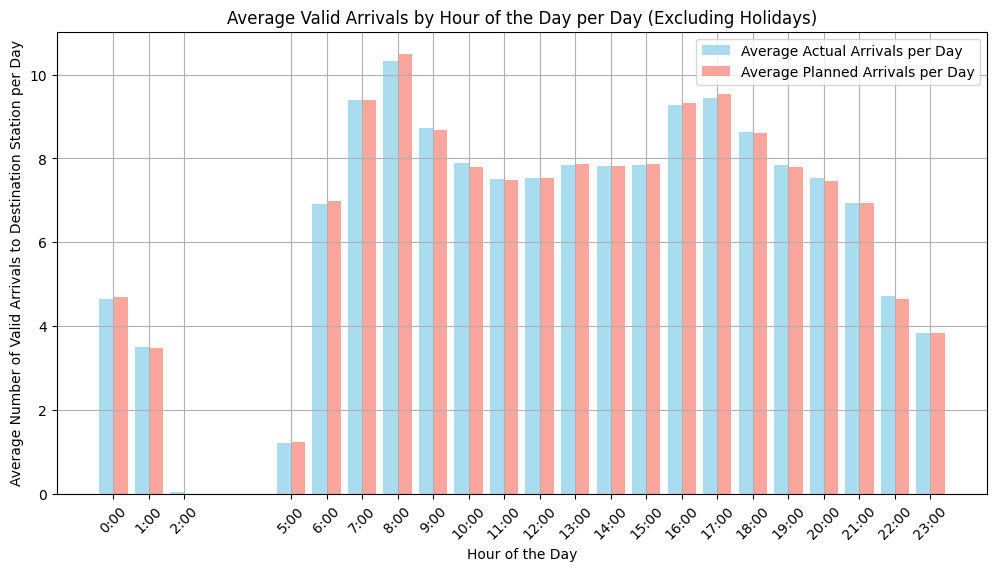

In [47]:
# Filter out holiday dates from valid_destination_arrivals_workingdays DataFrame
valid_arrivals_no_holidays = valid_arrivals[~valid_arrivals['Datum (PAU)'].dt.date.astype(str).isin(holiday_dates)]

# Calculate hourly counts for valid actual arrivals (excluding cancelled) based on actual arrival time
hourly_valid_counts = valid_arrivals_no_holidays.groupby(valid_arrivals_no_holidays['Ankomsttid'].dt.hour).size()

# Calculate hourly counts for valid planned arrivals based on planned arrival time
hourly_valid_counts_planned = valid_arrivals_no_holidays.groupby(valid_arrivals_no_holidays['Planerad ankomsttid'].dt.hour).size()

# Calculate the number of days with valid arrivals (excluding holidays)
num_days = len(valid_arrivals_no_holidays['Datum (PAU)'].dt.date.unique())

# Calculate the average valid arrivals per hour per day
hourly_average_counts = hourly_valid_counts / num_days
hourly_average_counts_planned = hourly_valid_counts_planned / num_days

# Plotting the results for hourly averages per day
plt.figure(figsize=(12, 6))

# Plot bar chart for average actual arrivals per day
plt.bar(hourly_average_counts.index - 0.2, hourly_average_counts, width=0.4, color='skyblue', alpha=0.7, label='Average Actual Arrivals per Day')

# Plot bar chart for average planned arrivals per day
plt.bar(hourly_average_counts_planned.index + 0.2, hourly_average_counts_planned, width=0.4, color='salmon', alpha=0.7, label='Average Planned Arrivals per Day')

# Add labels and title
plt.title('Average Valid Arrivals by Hour of the Day per Day (Excluding Holidays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Valid Arrivals to Destination Station per Day')
plt.xticks(hourly_average_counts.index, [f'{hour}:00' for hour in hourly_average_counts.index], rotation=45)  # Set x-axis ticks and labels
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Spatial distribution of traffic data

### > Number of trains departures per station

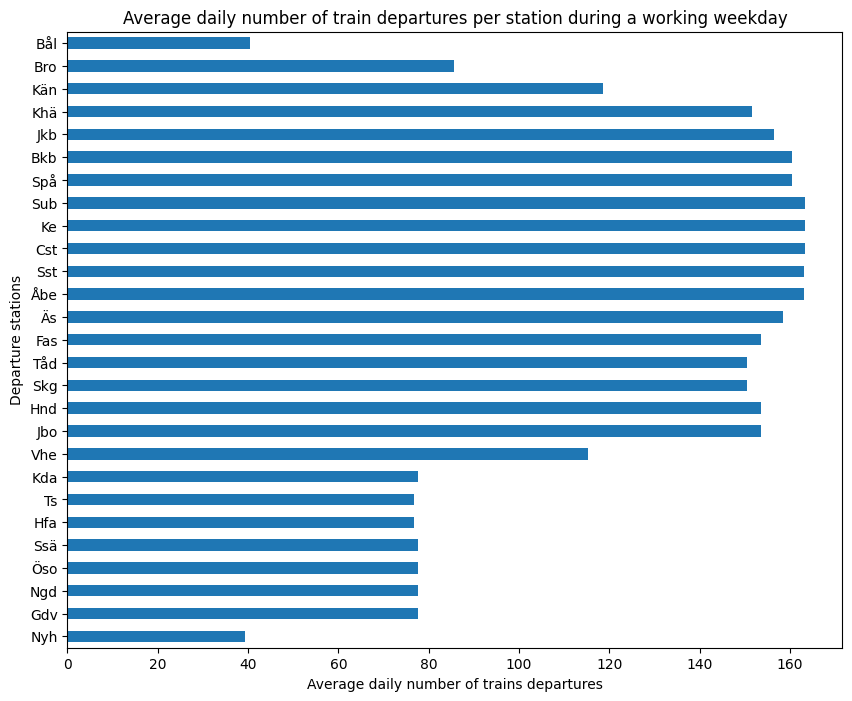

In [53]:
# List of stations from Nyh to Bal
stations_order = ['Nyh', 'Gdv', 'Ngd', 'Öso', 'Ssä', 'Hfa', 'Ts', 'Kda', 'Vhe', 'Jbo', 'Hnd', 'Skg', 'Tåd', 'Fas', 'Äs', 'Åbe', 'Sst', 'Cst', 'Ke', 'Sub', 'Spå', 'Bkb', 'Jkb', 'Khä', 'Kän', 'Bro', 'Bål']

# Count total departures per station
total_departures_count = traffic_data_filtered['Från platssignatur'].value_counts()

# avg per day (5 working weeks)
nb_day = 5*5
avg_departures_count = total_departures_count/nb_day

# Create a DataFrame for the total departures
station_counts = pd.DataFrame({
    'Total Departures': avg_departures_count
}).fillna(0)

# Sort stations according to the specified order
# Filter to include only stations in stations_order and reindex accordingly
station_counts = station_counts[station_counts.index.isin(stations_order)].reindex(stations_order)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))
station_counts.plot(kind='barh', stacked=False, ax=ax, legend=False)
ax.set_xlabel('Average daily number of trains departures')
ax.set_ylabel('Departure stations')
ax.set_title('Average daily number of train departures per station during a working weekday')
plt.show()


### > Number of trains departures per station and direction (northbound or south)

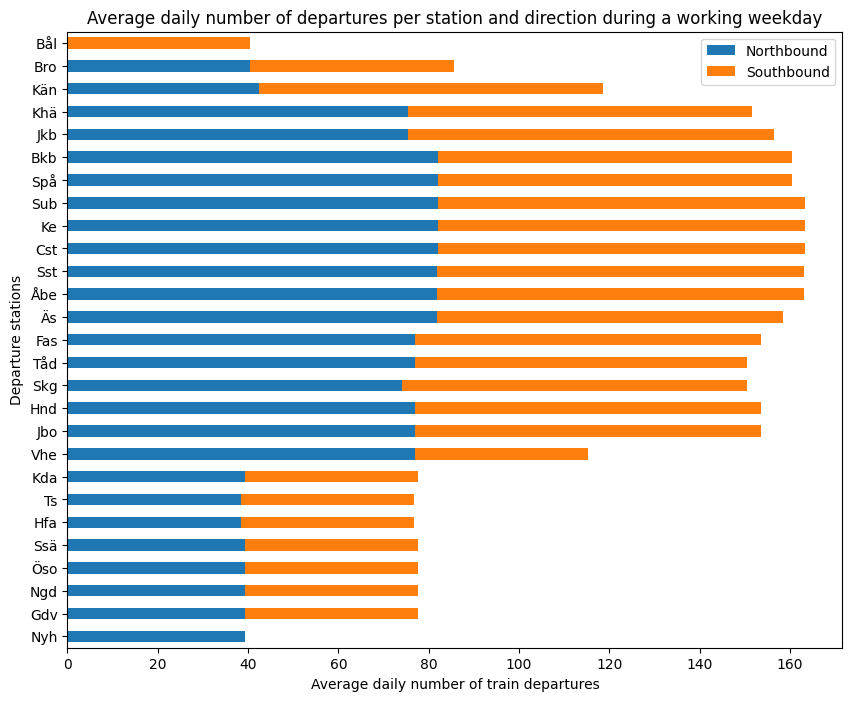

In [54]:
# List of stations from Nyh to Bal
stations_order = ['Nyh', 'Gdv', 'Ngd', 'Öso', 'Ssä', 'Hfa', 'Ts', 'Kda', 'Vhe', 'Jbo', 'Hnd', 'Skg', 'Tåd', 'Fas', 'Äs', 'Åbe', 'Sst', 'Cst', 'Ke', 'Sub', 'Spå', 'Bkb', 'Jkb', 'Khä', 'Kän', 'Bro', 'Bål']
# Convert stations_order to uppercase
stations_order_upper = [station.upper() for station in stations_order]

# Helper function to get station index
def get_station_index(station, stations_order):
    return stations_order.index(station) if station in stations_order else -1

# Create boolean masks for northwards and southwards departures
northwards_departures = traffic_data_filtered[
    traffic_data_filtered.apply(lambda x: get_station_index(x['Sista platssignatur'], stations_order_upper) > get_station_index(x['Första platssignatur'], stations_order_upper), axis=1)
]

southwards_departures = traffic_data_filtered[
    traffic_data_filtered.apply(lambda x: get_station_index(x['Sista platssignatur'], stations_order_upper) < get_station_index(x['Första platssignatur'], stations_order_upper), axis=1)
]

# Count northwards and southwards departures per station
nb_day = 5*5 # avg per day (5 working weeks)
avg_departures_count = total_departures_count/nb_day
northwards_departures_count = northwards_departures['Från platssignatur'].value_counts()/nb_day
southwards_departures_count = southwards_departures['Från platssignatur'].value_counts()/nb_day

# Combine the counts into a single DataFrame
station_counts = pd.DataFrame({
    'Northbound': northwards_departures_count,
    'Southbound': southwards_departures_count
}).fillna(0)

# Filter to include only stations in stations_order and reindex accordingly
station_counts = station_counts[station_counts.index.isin(stations_order)].reindex(stations_order)

fig, ax = plt.subplots(figsize=(10, 8))
station_counts.plot(kind='barh', stacked=True, ax=ax)  # 'barh' creates a horizontal bar plot
ax.set_ylabel('Departure stations')
ax.set_xlabel('Average daily number of train departures')
ax.set_title('Average daily number of departures per station and direction during a working weekday')
plt.legend(loc='upper right')
plt.show()

### > Number of trains departures and arrivals per station

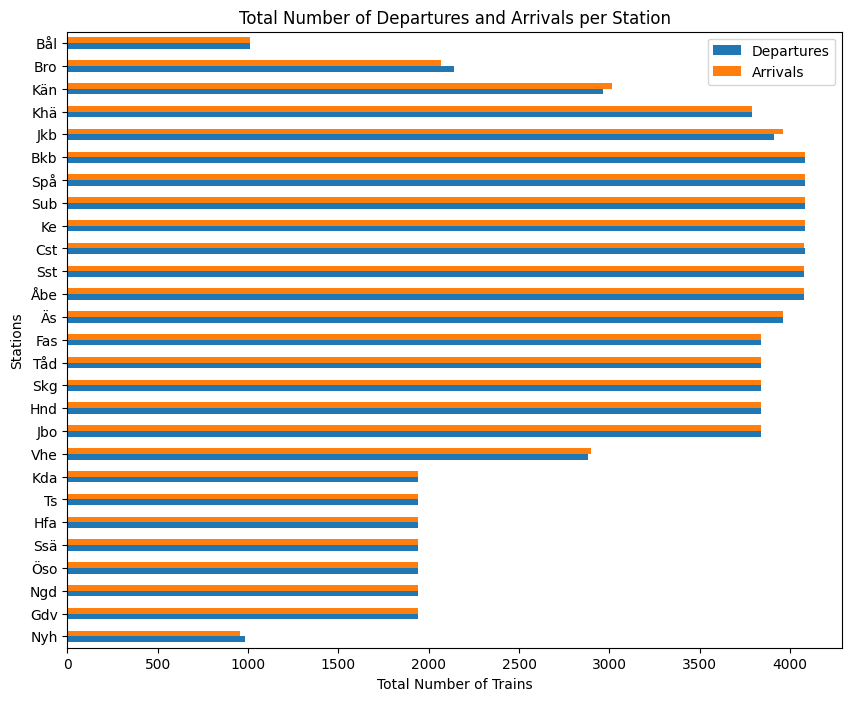

In [37]:
# Count departures and arrivals per station
departures_count = traffic_data_filtered['Från platssignatur'].value_counts()
arrivals_count = traffic_data_filtered['Till platssignatur'].value_counts()

# Combine the counts into a single DataFrame
station_counts = pd.DataFrame({
    'Departures': departures_count,
    'Arrivals': arrivals_count
}).fillna(0)

stations_order = ['Nyh', 'Gdv', 'Ngd', 'Öso', 'Ssä', 'Hfa', 'Ts', 'Kda', 'Vhe', 'Jbo', 'Hnd', 'Skg', 'Tåd', 'Fas', 'Äs', 'Åbe', 'Sst', 'Cst', 'Ke', 'Sub', 'Spå', 'Bkb', 'Jkb', 'Khä', 'Kän', 'Bro', 'Bål']

# Sort stations according to the specified order
station_counts = station_counts.loc[stations_order]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))
station_counts.plot(kind='barh', stacked=False, ax=ax)
ax.set_xlabel('Total Number of Trains')
ax.set_ylabel('Stations')
ax.set_title('Total Number of Departures and Arrivals per Station')
plt.show()